## Una imagen vale mil palabras

Construir una grafica es el arte (si si arte!) de resumir una informacion enorme (varios años, variables, miembros, puntos) en un grafica de una manera:

- sintetica
- comprehensible
- estetica

Una "buena" figura necessita mucho tiempo i muchas fases preparatorias:
- 1) question scientifica
- 2) diseño de la analisis estatistica
- 3) diseño de la figura 
- 4) exploracion de los datos (verificacion que son correctos en particular)
- 5) analysis estatisca
- 6) verificacion de la correctitud de la analysis
- 7) figura illustrando los resultados
- 8) interpretacion
- 9) vuelta al punto 1 o 2 (unas cuantes veces)
- 10) relfexion sobre el diseño de la figura (se puede sintetizar la informacion de una mejor manera?)
- 11) vuelta al punto 3 (unas cuantes veces)
- 12) mejora estetica de la figura (axis, titulo, colores....)

En esta classe, hemos trabajado (un poco) hasta ahora los puntos 4, 5. En el proyecto trabajareis la resta de los puntos, hoy veremos unos poquitos ejemplos para el punto 3, 7 y 12. Pero teneis que tener claro, que en 2h, no sabreis todo lo que se puede hacer, ni como hacerlo, y que muchissimo de vuestro trabajo de investigador consistira en buscar la informacion que os falta en internet.

In [9]:
import numpy as np
import matplotlib.colors as mc #import to_rgb
import matplotlib.cm as cm
import scipy.stats as stats
import math as m
import matplotlib.pyplot as plt
import calendar
import datetime

## Typo de graficas 

### Lines

/home/chloe/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/chloe/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/chloe/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


<IPython.core.display.Javascript object>


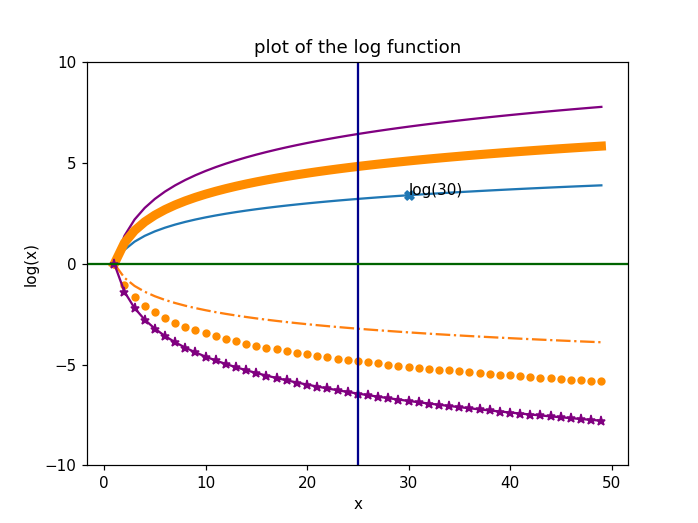

In [18]:
%matplotlib notebook
# create the x vector
x = np.arange(50)

# create several y
y1 = np.log(x)
y2 = np.log(x)*2
y3 = np.log(x)*1.5

# basic plot
plt.plot(x, y1)
#change color
plt.plot(x, y2, color="purple")
#line thickness
plt.plot(x, y3, color="darkorange", linewidth=6)
# change linestyle: https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
plt.plot(x, -y1, linestyle="dashdot")
#put a marker for each data
plt.plot(x, -y2, color="purple", marker = "*")
# remove the line
plt.scatter(x, -y3, color="darkorange", marker = "o", s=20)

#draw a vertical line
plt.axvline(x=25, color="darkblue")
#draw a horizontal line
plt.axhline(y=0, color="darkgreen")

# set axis label
plt.xlabel("x")
plt.ylabel("log(x)")

#write text on the picture
plt.text(30,y1[30], "log(30)")
# with a marker: https://matplotlib.org/3.1.1/api/markers_api.html
plt.scatter(30,y1[30], marker="X")

#define figure range
plt.yticks(np.arange(-10,11, step=5))

#define title
plt.title("plot of the log function")
plt.savefig("log.pdf")



#### 1) Ejercicio: realizar una figura en la cual mostrais la media annual de la NAO i la media annual de la AMO (Atlantic Multidecadal Oscilation). Añadir un marcador con un texto por el minimo i el maximo de las dos series, poner labels i titulos.

Read the NAO

In [11]:
# read the file
f = open("norm.nao.monthly.b5001.current.ascii", "r")
#data = f.read()
#create a list to store the NAO
NAO = []
#create a list to store the NAO
dates = []
# read the file line by line
for line in f:
    #separate the different columns
    aux = line.split()
    #store the dates
    dates.append(datetime.date(year = int(aux[0]), month = int(aux[1]), day = 15))
    #store the NAO
    NAO.append(float(aux[2]))
f.close()   

 
#Convert in numpy array
NAO = np.array(NAO)
dates = np.array(dates)

In [12]:


# remove years after 2019
datesshort = dates[dates<datetime.date(year = 2019, month = 1, day = 1)]
NAOshort = NAO[dates<datetime.date(year = 2019, month = 1, day = 1)]


#organizar por año y hacer media anual
NAOshort.shape = int(NAOshort.shape[0]/12), 12
datesshort.shape = int(datesshort.shape[0]/12), 12

#annual mean
NAOyear = np.mean(NAOshort, axis = 1)
#keep the corresponding date
datesyear = datesshort[:,0]

Read the AMO (https://www.youtube.com/watch?v=a0KlOA22ne4)

In [13]:
# read the file
f = open("amon.us.data", "r")
#data = f.read()
#create a list to store the NAO
AMO = []
#create a list to store the NAO
datesAMO = []
#read and ignore the header and the last lines
lines = f.readlines()
lines = lines[1:-3]

# read the file line by line
for line in lines:
    #separate the different columns
    aux = line.split()
    #read the different month
    for imon in range(1,len(aux)):
        #store the dates
        datesAMO.append(datetime.date(year = int(aux[0]), month = int(imon), day = 15))
        #store the AMO
        AMO.append(float(aux[imon]))
f.close()   

#convert to numpy arrays
datesAMO = np.array(datesAMO)
AMO = np.array(AMO)

#keep only common dates with NAO time serie
indcomondates = np.where((datesAMO>=datesshort[0,0])&(datesAMO<=datesshort[-1,-1]))
datesAMOshort = datesAMO[indcomondates]
AMOshort = AMO[indcomondates]


#organizar por año y hacer media anual
AMOshort.shape = int(AMOshort.shape[0]/12), 12
datesAMOshort.shape = int(datesAMOshort.shape[0]/12), 12

#annual mean
AMOyear = np.mean(AMOshort, axis = 1)
#keep the corresponding date
datesyear = datesshort[:,0]

#check that the dates are the same
if not(np.array_equal(datesAMOshort,datesshort)):
    print("the two time seria does not have the same dates")


<IPython.core.display.Javascript object>


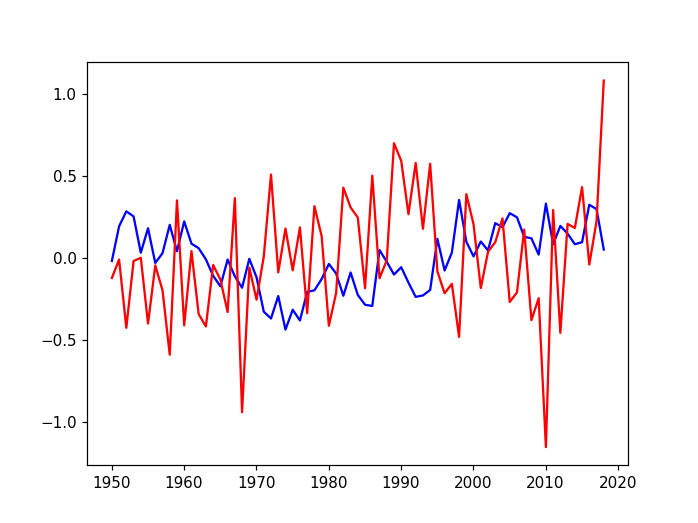

In [17]:
%matplotlib notebook
plt.plot(datesyear, AMOyear, color="blue")
plt.plot(datesyear, NAOyear, color="red")

In [ ]:
from sc

### Scatter plots

#### Ejercicio: Un scatter plot es un plot para relacionar dos variables, llamado tambien nube de puntos. Dibujar el scatter plot que relaciona el AMO con la NAO. Es decir que el axis x tiene que ser el AMO y el axis y la NAO, dibujar un punto por cada año. Modifcar labels i titulos. 

#### Calcular la regression entre el AMO i la NAO i dibujar la linea de regression en el scatter plot.

## Multi panels

A veces queremos poner varias graficas en la misma figura (mutipanel). Existes varias maneras de definir multi panels, para mas informacion ver esta documentacion: https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(2, 3)


In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(2, 3)
fig.tight_layout(pad=2)


In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(16,8))


In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

NB: toda esta primera parte se prodria hacer tambien utilizando panda i sus funcionalitats de plot. El codigo seria mas elegante.

<IPython.core.display.Javascript object>


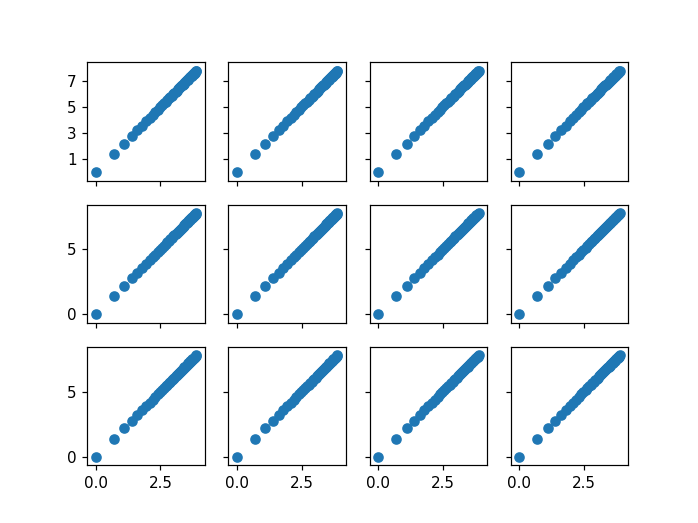

In [21]:
nrow = 3
ncol = 4
fig, ax = plt.subplots(nrow, ncol, sharex='col', sharey='row')
ax[0,0].set_yticks([1,3,5,7])
for icol in range(ncol):
    for irow in range(nrow):
        ax[irow, icol].scatter(y1, y2)

#### Ejercicio: Dibujar en un multipanel por cada mas el scatter plot que relaciona el AMO de este mes con la NAO de este mismo mes. Es decir que el axis x tiene que ser el AMO y el axis y la NAO, dibujar un punto por cada año. Modifcar labels i titulos. 